<a href="https://colab.research.google.com/github/nicocrozier/catsvsdogs/blob/main/BearDetect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install fastai
!pip install fastai --upgrade
!pip install -Uqq fastbook
!pip install DuckDuckGoImages
!pip install -q jmd_imagescraper
!pip install voila
!juypter serverextension enable voila --sys-prefix

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
voila 0.2.12 requires nbconvert<7,>=6.0.0, but you have nbconvert 5.6.1 which is incompatible.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.26.0 which is incompatible.
google-colab 1.0.0 requires tornado~=5.1.0; python_version >= "3.0", but you have tornado 6.1 which is incompatible.
  Using cached nbconvert-6.1.0-py3-none-any.whl (551 kB)
  Attempting uninstall: nbconvert
    Found existing installation: nbconvert 5.6.1
    Uninstalling nbconvert-5.6.1:
      Successfully uninstalled nbconvert-5.6.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
nbdev 1.1.22 requires nbconvert<6, but you have nbconvert 6.1.0 which is incompatible.
google-colab 1.0.0 requires requ

/bin/bash: juypter: command not found


In [6]:

import fastai
import fastbook
fastbook.setup_book()
from fastbook import *
from fastai.vision.widgets import *
from jmd_imagescraper.core import * 
from pathlib import Path
from jmd_imagescraper.imagecleaner import *

In [7]:
animals=['cat','dog']
path = Path().cwd()/"animals" #assigns path to current working directory

In [4]:
#downloads 100 images of 'cats' and saves it in path/cat
duckduckgo_search(path,"cat","cats",max_results=100) 


Duckduckgo search: cats


[Path('/content/animals/cat/101_3c4ff48a.jpg'),
 Path('/content/animals/cat/102_13fc78cf.jpg'),
 Path('/content/animals/cat/103_c5e8a0ce.jpg'),
 Path('/content/animals/cat/104_fb4f9cf3.jpg'),
 Path('/content/animals/cat/105_0f94f11d.jpg'),
 Path('/content/animals/cat/106_0af17dd6.jpg'),
 Path('/content/animals/cat/107_b8a30c4c.jpg'),
 Path('/content/animals/cat/108_ccf74c8f.jpg'),
 Path('/content/animals/cat/109_6a2aee2d.jpg'),
 Path('/content/animals/cat/110_1e5f6f42.jpg'),
 Path('/content/animals/cat/111_d417ef75.jpg'),
 Path('/content/animals/cat/112_68756834.jpg'),
 Path('/content/animals/cat/113_388be0ad.jpg'),
 Path('/content/animals/cat/114_74980ae9.jpg'),
 Path('/content/animals/cat/115_8fb028bd.jpg'),
 Path('/content/animals/cat/116_2676dd9d.jpg'),
 Path('/content/animals/cat/117_a7e5b9ea.jpg'),
 Path('/content/animals/cat/118_00d90d5f.jpg'),
 Path('/content/animals/cat/119_f58724f2.jpg'),
 Path('/content/animals/cat/120_6ae6a512.jpg'),
 Path('/content/animals/cat/121_e8db23fd

In [8]:
# downloads 100 images of 'dogs' and saves it in path/dog
duckduckgo_search(path, "dog", "dogs", max_results=100)

Duckduckgo search: dogs


Exception occured while retrieving https://tse4.mm.bing.net/th?id=OIP.oDsfXa8s-usDgo-mcLfDtQHaIB&pid=Api


[Path('/content/animals/dog/101_524cecdf.jpg'),
 Path('/content/animals/dog/102_02f509cb.jpg'),
 Path('/content/animals/dog/103_4ebdc490.jpg'),
 Path('/content/animals/dog/104_1ecf7be9.jpg'),
 Path('/content/animals/dog/105_e47d5665.jpg'),
 Path('/content/animals/dog/106_d16ed30c.jpg'),
 Path('/content/animals/dog/107_1917f595.jpg'),
 Path('/content/animals/dog/108_61da1695.jpg'),
 Path('/content/animals/dog/109_8d5867a4.jpg'),
 Path('/content/animals/dog/110_3155f180.jpg'),
 Path('/content/animals/dog/111_a0248403.jpg'),
 Path('/content/animals/dog/112_19461cf2.jpg'),
 Path('/content/animals/dog/113_28b0ffbf.jpg'),
 Path('/content/animals/dog/114_79edc73f.jpg'),
 Path('/content/animals/dog/115_3e4634ce.jpg'),
 Path('/content/animals/dog/116_bbec03f3.jpg'),
 Path('/content/animals/dog/117_d00fccf3.jpg'),
 Path('/content/animals/dog/118_7b48c651.jpg'),
 Path('/content/animals/dog/119_627defb6.jpg'),
 Path('/content/animals/dog/120_b38ad271.jpg'),
 Path('/content/animals/dog/122_f2050446

In [9]:
display_image_cleaner(path)

HTML(value='<h2>No images left to display in this folder.</h2>', layout=Layout(visibility='hidden'))

GridBox(children=(VBox(children=(Image(value=b'', layout="Layout(width='150px')"), Button(description='Delete'…

In [10]:
fns = get_image_files(path)
fns

(#399) [Path('/content/animals/cat/043_4ab0c279.jpg'),Path('/content/animals/cat/172_3591d685.jpg'),Path('/content/animals/cat/175_f58a3d87.jpg'),Path('/content/animals/cat/102_13fc78cf.jpg'),Path('/content/animals/cat/127_e50ab5e6.jpg'),Path('/content/animals/cat/015_2ad2b88f.jpg'),Path('/content/animals/cat/071_f5f70f95.jpg'),Path('/content/animals/cat/157_0b2e9916.jpg'),Path('/content/animals/cat/096_0c18a50d.jpg'),Path('/content/animals/cat/081_6dcc7662.jpg')...]

In [11]:
# look for failed downloads and unlink them (remove) from folder

failed = verify_images(fns) # looks for files that are not images
failed

(#0) []

In [12]:
failed.map(Path.unlink); # unlinks the failed files

Now we have a bunnch of images (197) of cats and dogs in their respective folders. Now we create a model.

But first we need to tell FastAI what kind of data we have and how it' structured. 

DataBlock(
  blocks=(INDEPENDANT VAR, DEPENDANT VAR),<br>
  get_items=get_image_files,<br>
  splitter=RandomSplitter(VALID, SEED), *# how you will split the data for training and validation* <br>
  get_y=parent_label, *# how to label the data, name of function, parent_label, look at each item the name of the parent, example: "/content/animals/cat/040_b1d6904e.jpg" - parent_label is cat* <br>
  item_tfms=Resize(128) *# functions that get applied to each images, so each in this case each image will be re sized to a 128x128 square.*
)

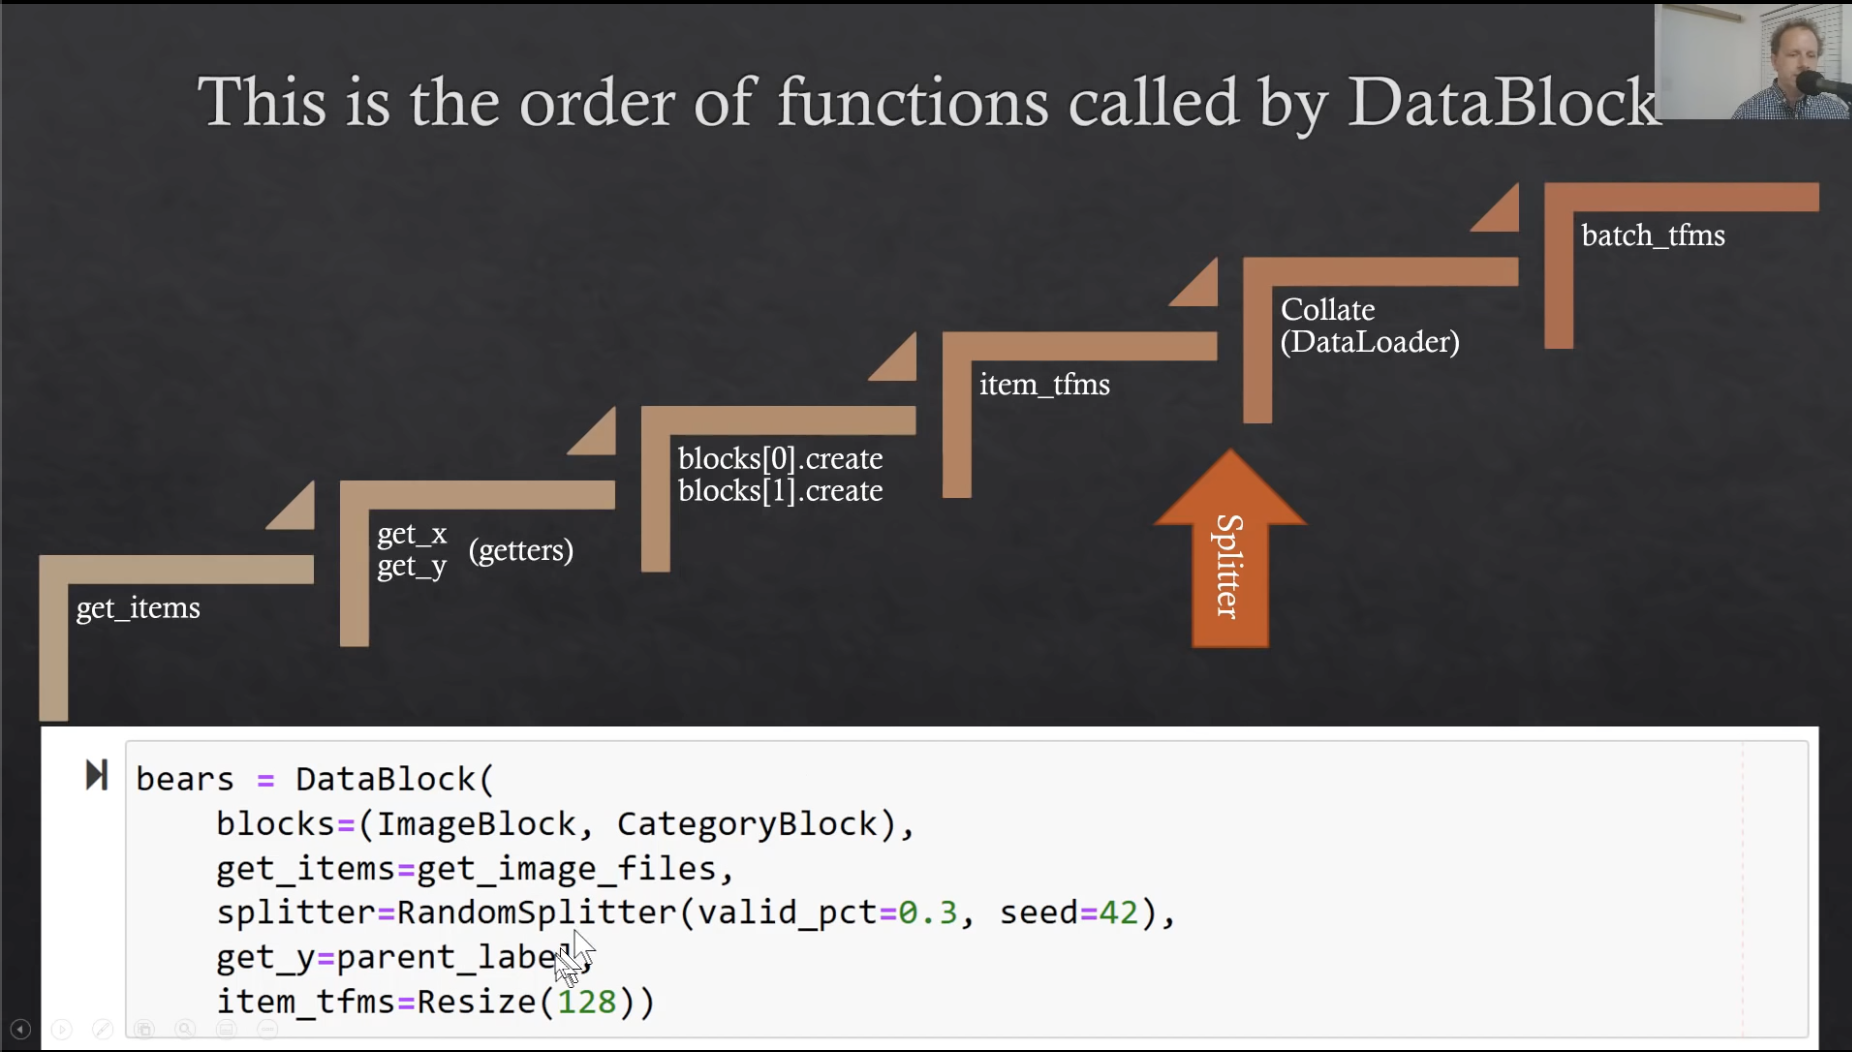

In [13]:
# dataloaders

animals=DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.3, seed=42),
    get_y=parent_label,
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms()
)

DataLoaders is a class which provides batches of a few items at a time to the GPU

In [14]:
dls=animals.dataloaders(path)

/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1023: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  /pytorch/aten/src/ATen/native/BatchLinearAlgebra.cpp:760.)
  ret = func(*args, **kwargs)


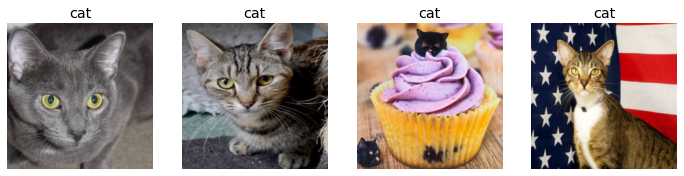

In [15]:
dls.valid.show_batch(max_n=4, nrows=1)

**Train the model**

Call for a learner that learns based on the input images in 4 different training iterations or epochs. 



In [16]:
learn = cnn_learner(dls, resnet18, metrics=error_rate) # training model
learn.fine_tune(4)

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


epoch,train_loss,valid_loss,error_rate,time
0,1.073849,0.133546,0.058824,00:04


epoch,train_loss,valid_loss,error_rate,time
0,0.229960,0.061396,0.025210,00:05
1,0.151785,0.058237,0.033613,00:05
2,0.118987,0.081909,0.042017,00:05
3,0.091725,0.086771,0.042017,00:05


**Confusion Matrix**

Tells us how many of the images in the validation set were correctly or incorrectly classified.

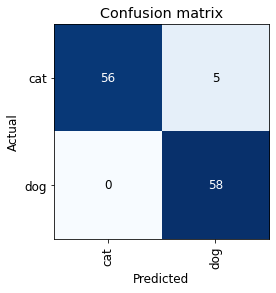

In [17]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix() # plots a confusion matrix

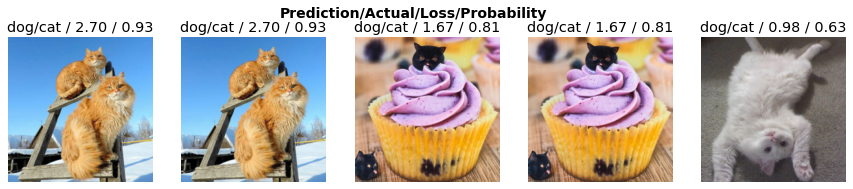

In [18]:
interp.plot_top_losses(5, nrows=1)

In [19]:
# exports the trained model so we can use in production
learn.export()
path = Path()
path.ls(file_exts='.pkl')

# using the trained model on NEW data in production is called "inference". 
# learn_inf is now our program, its our cat/dog predictor. it takes inputs
learn_inf = load_learner(path/'export.pkl')

#Displays a widget which can be used to upload images from your system
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [20]:
img = PILImage.create(btn_upload.data[-1])

out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))#resizes the uloaded image
out_pl


IndexError: ignored

In [ ]:
pred,pred_idx,probs = learn_inf.predict(img)#asks the model to predict the animal in the image!
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'#displays the output in a readable format
lbl_pred


In [ ]:
# clean

cleaner = ImageClassifierCleaner(learn)
cleaner

In [ ]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()
for idk,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx])), path/cat

Create a Notebook App

In [21]:
!pip install voila
!juypter serverextension enable voila --sys-prefix

/bin/bash: juypter: command not found


In [36]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

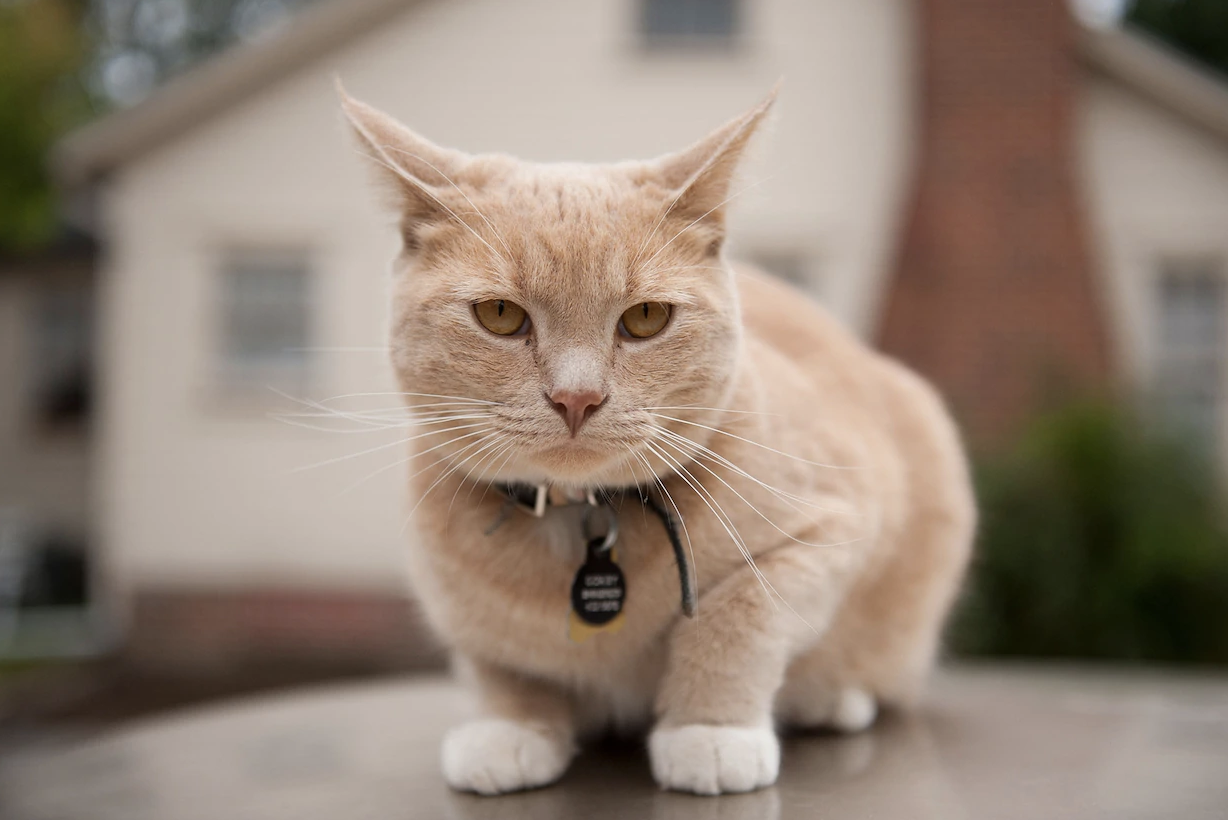

In [37]:
img = PILImage.create(btn_upload.data[-1])
img

In [40]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [42]:
lbl_pred = widgets.Label()
lbl_pred.value = 'Please choose an image'
lbl_pred

Label(value='Please choose an image')

In [47]:
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

Event handler, a function that will be called when pressed.

In [48]:
def on_click_classify(change):
  img = PILImage.create(btn_upload.data[-1])
  out_pl.clear_output()
  with out_pl: display(img.to_thumb(128,128))
  pred, pred_idx, probs = learn_inf.predict(img)
  lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

Create a VBox (vertical box)

In [49]:
btn_upload = widgets.FileUpload()


In [50]:
VBox([widgets.Label('Select your bear!'),
      btn_upload, btn_run, out_pl, lbl_pred])